
# dimensionality reduction techinque :
it is a process of reducing the number of features while retaning as much information as poss
# to reduce the complexity of a model
# make it easier to visualize the data
# to improve the performance of the data


# there are two main approaches to reduce the dimensionality:
# feature selection
# feature extraction


# feature selection : the  goal is to reduce the dimensionality of the dataset while retaining the important features .
# several methods are there which is being used for feature selection
# 1 filter method :  rank the features

#2 wrapper method :   to check the collinearity

#3 embedded method : combining the features


# feature extraction:  creating new features by combining or transforming the  original features  


# pca : it a way to simplify complex data by reducing the number of varaibles while  keeping the most important information intact


# lda : it is method used to reduce the number of features in data while helping classify the things into  groups




#



# limitations of Lda:
1. Linearity assumptions : only work when your data is linearly separable

2. Normality assumptio : assume that features should follow gaussian distibution


3. sensitive to outliers : outliers can effect the result

4 . Require numerical data : doesnt work  directly with categorical data

 5: limited for certain boundries :  struggle with non-linear data



lda                                                     

supervised (class labels)  


Maximizes the class separation

best for classification task


assume normality and linear separability





PCA

unsupervised (ignores the class labels)


Maximize the total variance


best for dimensionality reduction

 no specific assumption about labels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df  = pd.read_csv('/content/drive/MyDrive/csgo_round_snapshots (1).csv')

In [ ]:
# df  = pd.read_csv('/content/csgo_round_snapshots (1).csv')

In [ ]:
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


In [ ]:
df.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [ ]:
df.isnull().sum()

,0
time_left,0
ct_score,0
t_score,0
map,0
bomb_planted,0
...,...
ct_grenade_molotovgrenade,0
t_grenade_molotovgrenade,0
ct_grenade_decoygrenade,0
t_grenade_decoygrenade,0


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum()

4962

In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
# Identify columns with dtype 'object' and / or 'bool' using lamda function

cols = df.columns[df.dtypes.apply(lambda x: x in ['object', 'bool'])]

print(cols)


Index(['map', 'bomb_planted', 'round_winner'], dtype='object')


In [ ]:
# Identify columns with dtype 'object' and / or 'bool' using loop

cols2 = [col for col in df.columns if df[col].dtype in ['object', 'bool']]

In [ ]:
cols2

['map', 'bomb_planted', 'round_winner']

In [ ]:
cols = (col for col in df.columns if df[col].dtype in ['object', 'bool'])

In [ ]:
cols

<generator object <genexpr> at 0x7f91f303dc40>

In [ ]:
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


In [ ]:
df.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,117448.000000,117448.000000,117448.000000,117448.000000,117448.000000,117448.000000,117448.000000,117448.000000,117448.000000,117448.000000,...,117448.000000,117448.000000,117448.000000,117448.000000,117448.000000,117448.000000,117448.000000,117448.000000,117448.000000,117448.000000
mean,94.648097,6.769566,6.828775,408.522623,398.658828,317.751064,302.562300,10000.738625,11492.634613,2.120028,...,1.905320,1.895034,1.583084,1.671778,1.026318,0.020383,0.049605,1.386248,0.027689,0.025117
std,53.224518,4.802249,4.832447,133.833268,141.393442,170.339769,174.118608,11308.757451,12245.826779,1.831718,...,1.769392,1.803067,1.738460,1.835046,1.462231,0.145991,0.231219,1.671632,0.169642,0.162253
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.910000,3.000000,3.000000,336.000000,309.000000,195.000000,179.000000,1300.000000,1650.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.890000,6.000000,6.000000,500.000000,500.000000,382.000000,353.000000,5900.000000,7650.000000,2.000000,...,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,114.960000,10.000000,11.000000,500.000000,500.000000,487.000000,471.000000,15000.000000,18350.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


# feature engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
cols2

['map', 'bomb_planted', 'round_winner']

In [ ]:
df['bomb_planted'] = le.fit_transform(df['bomb_planted'])

df['map'] =le.fit_transform(df['map'])
df['round_winner']=le.fit_transform(df['round_winner'])

In [ ]:
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,6,1,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122406,174.93,11.0,15.0,6,0,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122407,114.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,1
122408,94.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,1


In [ ]:
# spliting the dataset

x = df.iloc[: ,: -1]
x


,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,6,1,200.0,242.0,195.0,359.0,100.0,...,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
122406,174.93,11.0,15.0,6,0,500.0,500.0,95.0,175.0,11500.0,...,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122407,114.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0
122408,94.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,1.0,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0


In [ ]:
y =df['round_winner']
y

,round_winner
0,0
1,0
2,0
3,0
4,0
...,...
122405,1
122406,1
122407,1
122408,1


In [ ]:
from  sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2 , random_state = 34)

In [ ]:
# standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [ ]:
x_train.shape

(93958, 96)

In [ ]:
y_train.shape

(93958,)

In [ ]:
# ldA implementation


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
lda.fit(x_train , y_train)

LinearDiscriminantAnalysis()

In [ ]:
lda.transform(x_test)

array([[-0.81532363],
       [-0.21230244],
       [-1.20064745],
       ...,
       [-3.10073701],
       [-0.58141048],
       [ 3.14354821]])

In [ ]:
lda.coef_

array([[ 1.40798218e-01, -1.63779539e-02,  1.65392901e-02,
        -8.44119919e-02,  2.45841039e-01, -4.25778801e-01,
         3.25206002e-01, -6.05044865e-01,  6.42755761e-01,
        -2.14088433e-01,  1.63286872e-01,  4.99608671e-02,
         7.13517526e-02, -3.50006793e-02, -2.23093635e-01,
         3.81277147e-01, -1.92314735e-01,  6.25316797e-01,
        -2.12493284e-01,  3.78495199e-02, -3.11983894e-01,
         2.44962696e-01, -2.18621069e-16, -1.56787590e-03,
         1.38840808e-02,  2.70750360e-04, -8.16982190e-03,
         1.45702604e-02, -1.41816668e-01,  4.89809549e-02,
         5.76767164e-16,  2.09674722e-02, -5.31379540e-02,
         1.37751078e-01,  1.92835708e-02, -1.71303471e-01,
         1.14972095e-02, -1.72407505e-15, -9.06436363e-02,
         4.98581963e-02, -4.67518881e-01,  1.13211531e-01,
        -1.40641808e-02,  1.08913917e-01, -1.83591480e-02,
         4.22382388e-03, -1.03658699e-02,  3.68348304e-02,
         7.66327721e-03, -1.10885542e-02, -1.13307614e-0

np.abs(lda.coef_) : take the absolute value of those cofficients


 np.exp(np.abs(lda.coef_))  : applies the exponential function to the absolute value


In [ ]:
lda_cofficients = np.exp(np.abs(lda.coef_))


lda_cofficients

array([[1.15119233, 1.01651281, 1.01667682, 1.08807708, 1.27869629,
        1.53078213, 1.38431579, 1.83133437, 1.90171433, 1.23873219,
        1.1773744 , 1.05122996, 1.07395893, 1.03562041, 1.24993761,
        1.46415333, 1.21205193, 1.86883791, 1.23675781, 1.03857494,
        1.36613269, 1.27757365, 1.        , 1.00156911, 1.01398091,
        1.00027079, 1.00820329, 1.01467692, 1.15236536, 1.05020035,
        1.        , 1.02118883, 1.05457512, 1.14768983, 1.0194707 ,
        1.18685087, 1.01156356, 1.        , 1.09487876, 1.05112203,
        1.59602934, 1.1198688 , 1.01416355, 1.11506636, 1.01852871,
        1.00423276, 1.01041978, 1.03752164, 1.00769272, 1.01115026,
        1.1199764 , 1.04053825, 1.        , 1.        , 1.01279379,
        1.02543605, 1.02617555, 1.01722542, 1.        , 1.00644933,
        1.        , 1.01443602, 1.00836656, 1.        , 1.23227922,
        1.76503401, 1.08609438, 1.01827171, 1.04401669, 1.09850959,
        1.02060003, 1.00232509, 1.02729629, 1.01

covert the 2d to 1d

In [ ]:
lda_cofficients = lda_cofficients.flatten()

In [ ]:
lda_cofficients

array([1.15119233, 1.01651281, 1.01667682, 1.08807708, 1.27869629,
       1.53078213, 1.38431579, 1.83133437, 1.90171433, 1.23873219,
       1.1773744 , 1.05122996, 1.07395893, 1.03562041, 1.24993761,
       1.46415333, 1.21205193, 1.86883791, 1.23675781, 1.03857494,
       1.36613269, 1.27757365, 1.        , 1.00156911, 1.01398091,
       1.00027079, 1.00820329, 1.01467692, 1.15236536, 1.05020035,
       1.        , 1.02118883, 1.05457512, 1.14768983, 1.0194707 ,
       1.18685087, 1.01156356, 1.        , 1.09487876, 1.05112203,
       1.59602934, 1.1198688 , 1.01416355, 1.11506636, 1.01852871,
       1.00423276, 1.01041978, 1.03752164, 1.00769272, 1.01115026,
       1.1199764 , 1.04053825, 1.        , 1.        , 1.01279379,
       1.02543605, 1.02617555, 1.01722542, 1.        , 1.00644933,
       1.        , 1.01443602, 1.00836656, 1.        , 1.23227922,
       1.76503401, 1.08609438, 1.01827171, 1.04401669, 1.09850959,
       1.02060003, 1.00232509, 1.02729629, 1.01504326, 1.03427

In [ ]:
feature_name= x.columns

feature_name

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

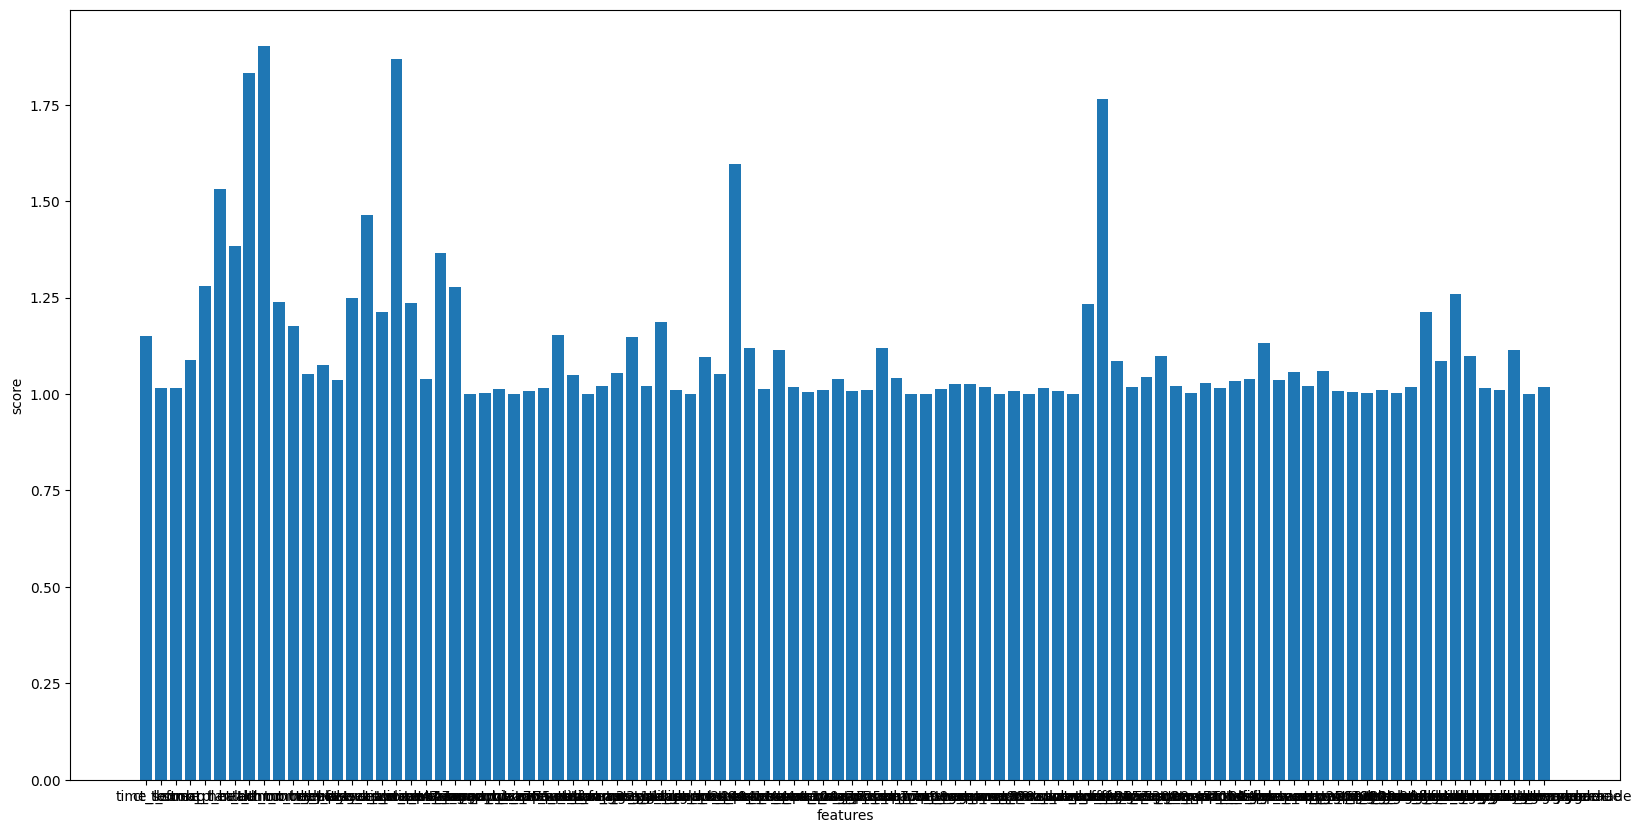

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(feature_name , lda_cofficients)

# plt.xticks(rotation = 90)
plt.xlabel("features")
plt.ylabel("score")
plt.show()

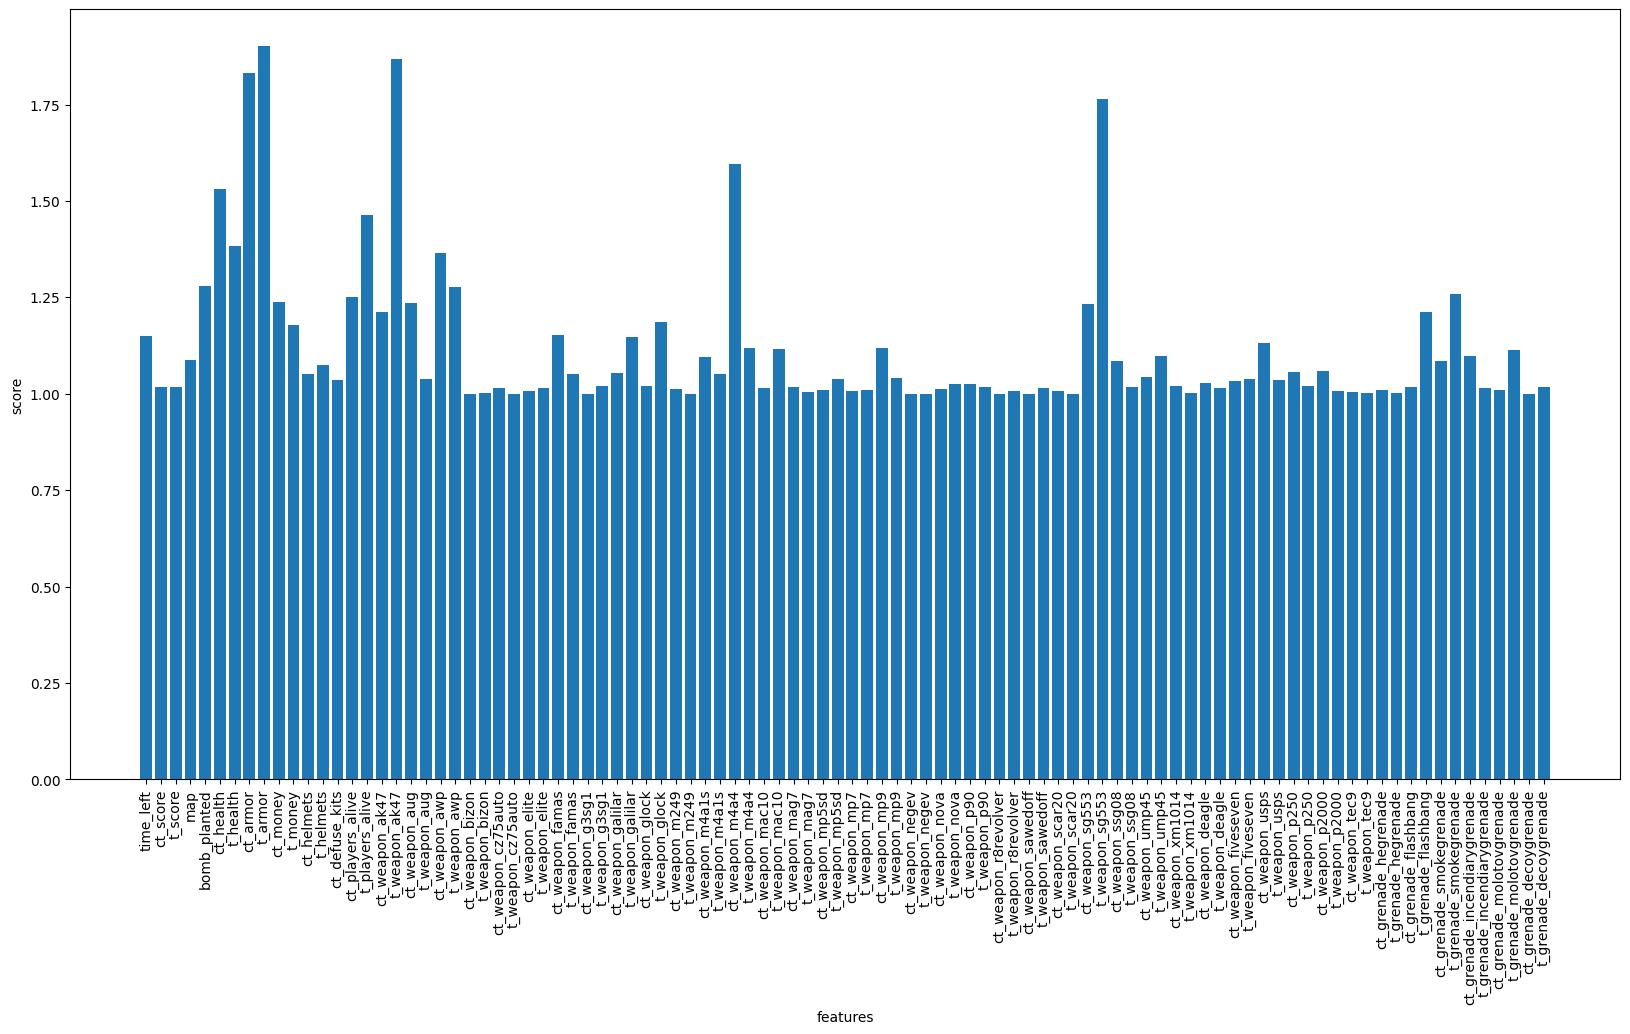

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(feature_name , lda_cofficients)

plt.xticks(rotation = 90)
plt.xlabel("features")
plt.ylabel("score")
plt.show()

In [ ]:
df_feature_score = pd.DataFrame({"feature_name": feature_name , "feature_score": lda_cofficients})

In [ ]:
df_feature_score

,feature_name,feature_score
0,time_left,1.151192
1,ct_score,1.016513
2,t_score,1.016677
3,map,1.088077
4,bomb_planted,1.278696
...,...,...
91,t_grenade_incendiarygrenade,1.014425
92,ct_grenade_molotovgrenade,1.011119
93,t_grenade_molotovgrenade,1.113260
94,ct_grenade_decoygrenade,1.000134


In [ ]:
top_20 = df_feature_score.nlargest(20 , "feature_score")

In [ ]:
top_20

,feature_name,feature_score
8,t_armor,1.901714
17,t_weapon_ak47,1.868838
7,ct_armor,1.831334
65,t_weapon_sg553,1.765034
40,ct_weapon_m4a4,1.596029
5,ct_health,1.530782
15,t_players_alive,1.464153
6,t_health,1.384316
20,ct_weapon_awp,1.366133
4,bomb_planted,1.278696


In [ ]:
imp_cols = top_20.index

imp_cols

Index([8, 17, 7, 65, 40, 5, 15, 6, 20, 4, 21, 89, 14, 9, 18, 64, 87, 16, 35,
       10],
      dtype='int64')

In [ ]:
x_train

array([[ 1.41686578,  0.04867334, -1.40859784, ..., -0.8280369 ,
        -0.1628247 , -0.15382351],
       [ 0.38227138, -0.99065426, -0.99586095, ...,  2.16418228,
        -0.1628247 , -0.15382351],
       [-1.49969795,  0.88013541,  1.06782348, ..., -0.8280369 ,
        -0.1628247 , -0.15382351],
       ...,
       [ 0.28772178,  1.29586645,  0.44871815, ...,  2.16418228,
        -0.1628247 , -0.15382351],
       [ 0.00689256,  1.29586645,  1.48056037, ...,  1.56573845,
        -0.1628247 , -0.15382351],
       [ 1.51085147,  0.46440437,  0.03598127, ..., -0.8280369 ,
        -0.1628247 , -0.15382351]])

In [ ]:
x_train.shape

(93958, 96)

In [ ]:
x_train = x_train[ : , imp_cols]

In [ ]:
x_test = x_test[: , imp_cols]

In [ ]:
x_train

array([[-1.73825231, -0.94029438, -0.19849244, ...,  1.2210558 ,
         1.06731306,  0.50792636],
       [ 1.02521179,  1.2541644 ,  0.48371375, ..., -0.47725904,
         1.06731306, -0.68489092],
       [-0.60069328, -0.94029438, -1.28061261, ...,  1.2210558 ,
        -1.99263947, -0.40302656],
       ...,
       [ 0.80689238,  1.2541644 ,  1.07182254, ..., -0.47725904,
         1.06731306,  0.94093538],
       [ 1.08266427,  0.52267814,  1.07182254, ..., -0.47725904,
         1.06731306, -0.47655639],
       [-0.08936625, -0.94029438, -1.86872139, ..., -0.47725904,
        -0.15666795,  0.56103124]])

In [ ]:
x_train.shape

(93958, 20)

In [ ]:
x_test.shape

(23490, 20)

In [ ]:
y_train

,round_winner
46655,0
4931,1
61390,1
23759,0
25860,0
...,...
97402,0
23141,1
44918,0
107644,1


In [ ]:
y_test.shape

(23490,)

In [ ]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.738252,-0.940294,-0.198492,-0.743743,-0.907498,0.684387,0.614814,0.717496,2.084163,-0.364083,-0.689961,-0.909722,0.619567,3.166033,-0.296341,-0.440699,-1.049887,1.221056,1.067313,0.507926
1,1.025212,1.254164,0.483714,-0.743743,-0.907498,0.684387,0.614814,0.717496,-0.875420,-0.364083,-0.689961,1.814845,0.619567,-0.856265,-0.296341,-0.440699,1.168070,-0.477259,1.067313,-0.684891
2,-0.600693,-0.940294,-1.280613,-0.743743,-0.907498,-2.303445,-0.989928,-0.865139,-0.875420,2.746628,-0.689961,-0.364809,-2.656273,-0.865095,-0.296341,-0.440699,-1.049887,1.221056,-1.992639,-0.403027
3,1.059683,1.254164,1.071823,0.128663,3.174906,0.684387,0.614814,0.717496,-0.875420,-0.364083,1.389839,0.725018,0.619567,-0.622256,-0.296341,-0.440699,1.722559,-0.477259,-0.156668,1.132930
4,-1.738252,-0.940294,-0.692504,-0.743743,-0.907498,0.684387,0.614814,0.717496,2.084163,-0.364083,-0.689961,-0.909722,0.619567,4.945380,-0.296341,-0.440699,-1.049887,-0.477259,1.067313,4.151738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93953,0.898816,-0.208808,1.071823,1.873476,0.725463,0.684387,0.614814,0.717496,2.084163,-0.364083,1.389839,1.814845,0.619567,-0.776790,1.841857,-0.440699,1.722559,-0.477259,0.455323,0.438482
93954,0.801147,0.522678,-0.716028,1.001070,-0.907498,0.684387,0.614814,0.717496,-0.875420,-0.364083,-0.689961,1.814845,0.619567,0.044447,-0.296341,-0.440699,1.722559,-0.477259,-0.156668,0.128022
93955,0.806892,1.254164,1.071823,1.001070,2.358425,0.684387,0.614814,0.717496,0.604371,-0.364083,-0.689961,1.814845,0.619567,-0.851849,-0.296341,-0.440699,1.722559,-0.477259,1.067313,0.940935
93956,1.082664,0.522678,1.071823,0.128663,-0.907498,0.684387,0.614814,0.717496,-0.875420,-0.364083,-0.689961,1.269932,0.619567,-0.798866,-0.296341,1.340562,1.722559,-0.477259,1.067313,-0.476556


In [ ]:
# model buidling


# apply decision tree classifier

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 38)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier()

In [ ]:
dt = dt_model.fit(x_train, y_train)

In [ ]:
dt

DecisionTreeClassifier()

In [ ]:
dt_pred = dt.predict(x_test)

In [ ]:
from sklearn.metrics import *

In [ ]:
accuracy_score(dt_pred, y_test)

0.8128991060025543

In [ ]:
#random forst classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf = rf_model.fit(x_train, y_train)

In [ ]:
rf

RandomForestClassifier()

In [ ]:
rf_pred = rf.predict(x_test)

In [ ]:
accuracy_score(rf_pred, y_test)

0.8673903788846318

In [ ]:
confusion_matrix(rf_pred, y_test)

array([[10135,  1769],
       [ 1346, 10240]])